# Polynomial Regression

### Generating Random data on curve 


y=-6.64-10.52*x-12.66*x^2


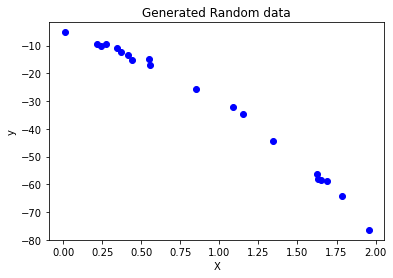

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
nsample=20

np.random.seed(100)
X = 2 * np.random.rand(nsample, 1)
a=5*np.random.randn()-10
b=5*np.random.randn()-10
c=5*np.random.randn()-10
y = a + b * X + c * X ** 2 +1*np.random.randn(nsample, 1)
print('y={:+0.2f}{:+0.2f}*x{:+0.2f}*x^2'.format(a,b,c))
plt.scatter(X, y, color='blue') 
plt.xlabel('X') 
plt.ylabel('y') 
plt.title('Generated Random data') 
plt.show()

### initialize parameters and adding quadratic features to X

In [19]:
from sklearn import preprocessing
# you can set degree of polynomial from 1-5 with 0.01 learning rate with increased degree you should lower learning rate


degree = 2
poly_features = PolynomialFeatures(degree=degree, include_bias=True)
X_poly = poly_features.fit_transform(X)
print(np.shape(X))
print(np.shape(X_poly))
print(X[0])
print(X_poly[0])



(20, 1)
(20, 3)
[1.08680988]
[1.         1.08680988 1.18115572]


### training using Normal Equation

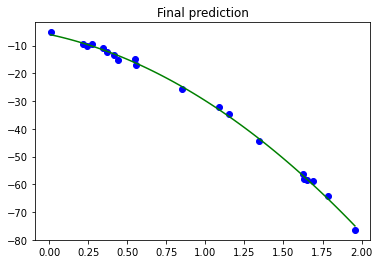

y=-6.64-10.52*x-12.66*x^2
teta1= [[ -5.97043385]
 [-12.02867861]
 [-11.88026327]]


In [20]:
def linear_regression_normal_equation(X, y):
    X_transpose = np.transpose(X)
    X_transpose_X = np.dot(X_transpose, X)
    X_transpose_y = np.dot(X_transpose, y)
     
    try:
        invx=np.linalg.inv(X_transpose_X)
        theta=np.dot(invx, X_transpose_y)
        return theta
    except np.linalg.LinAlgError:
        return None
 
 
# Add a column of ones to X for the intercept term
#X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]
 
theta1 = linear_regression_normal_equation(X_poly, y)
#print('teta1=',theta1)
#if theta is not None:
#    print(theta)
#else:
#    print("Unable to compute theta. The matrix X_transpose_X is singular.")
    
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_plot_poly = poly_features.transform(X_plot)
y_pred_plot = X_plot_poly.dot(theta1)
plt.scatter(X, y, color='blue')
plt.plot(X_plot, y_pred_plot, color='green')
plt.title(f"Final prediction")
plt.show()



print('y={:+0.2f}{:+0.2f}*x{:+0.2f}*x^2'.format(a,b,c))

print('teta1=',theta1)
